In [9]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv("https://huggingface.co/datasets/lukebarousse/data_jobs/resolve/main/data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_us = df[df["job_country"] == "United States"]

In [11]:
df_skill = df_us.explode("job_skills")

df_skill.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."


In [20]:
df_skill_count = df_skill.groupby(["job_skills","job_title_short"]).size()

df_skill_count = df_skill_count.reset_index(name='skill_count')

df_skill_count.sort_values(by="skill_count", ascending = False, inplace=True)

df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [29]:
job_titles = df_skill_count["job_title_short"].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

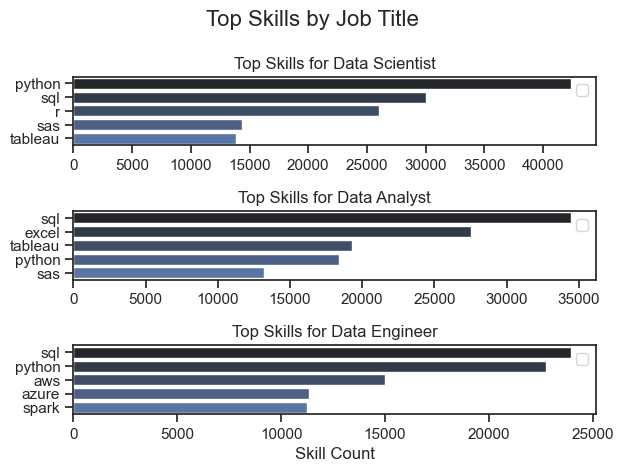

In [103]:

fig, ax = plt.subplots(len(job_titles),1)



for i, job_title in enumerate(job_titles):
    job_data = df_skill_count[df_skill_count["job_title_short"] == job_title].head(5)
    sns.barplot(x="skill_count", y="job_skills", data = job_data, ax=ax[i], label=job_title,hue="job_skills", palette="dark:b")
    ax[i].legend("")
    #ax[i].plt.xlim(0,40000)
    ax[i].set_xlabel("")
    ax[i].set_title(f"Top Skills for {job_title}")
    ax[i].set_ylabel("")
fig.suptitle("Top Skills by Job Title", fontsize=16)
ax[i].set_xlabel("Skill Count")
sns.set_theme(style="ticks")
plt.tight_layout()
plt.show()

In [77]:
df_us_perc = df_us["job_title_short"].value_counts()

In [82]:
df_skill_perc = pd.merge(df_skill_count,df_us_perc,how="left", on="job_title_short")

df_skill_perc

,job_skills,job_title_short,skill_count,count
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [84]:
df_skill_perc["percentage"] = df_skill_perc["skill_count"] / df_skill_perc["count"] * 100

df_skill_perc

,job_skills,job_title_short,skill_count,count,percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


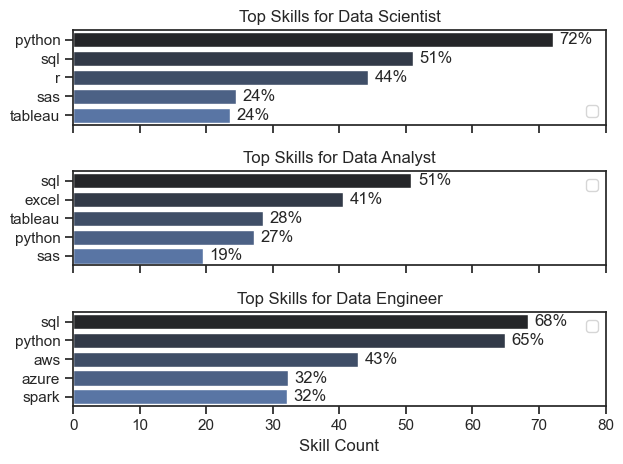

In [112]:

fig, ax = plt.subplots(len(job_titles),1)



for i, job_title in enumerate(job_titles):
    job_data = df_skill_perc[df_skill_perc["job_title_short"] == job_title].head(5)
    sns.barplot(x="percentage", y="job_skills", data = job_data, ax=ax[i], label=job_title,hue="job_skills", palette="dark:b")
    ax[i].legend("")
    ax[i].set_xlim(0,80)
    ax[i].set_xlabel("")
    ax[i].set_title(f"Top Skills for {job_title}")
    ax[i].set_ylabel("")
    if i!= len(job_titles) - 1:
        ax[i].set_xticklabels([])
    for n, v in enumerate(job_data['percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

ax[i].set_xlabel("Skill Count")
sns.set_theme(style="ticks")
plt.tight_layout()
plt.show()